# Review project B: Expression data from human nucleus accumbens in heroin users and controls

This project is for independent work during our in-class session. Our goal today is to review everything we've learned during the course so far. This specific project option is for those of you analyzing gene expression data. Try to practice matplotlib instead of ready-to-use bioinformatics packages!

You can practice:
- lambda functions;
- numpy functions;
- pandas: data cleaning, sorting and summaries;
- matplotlib for data visualization.

Dataset source: https://www.kaggle.com/andrewgao/heroin-users-accumbens-expression-data

Additional info: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA347812

<img src="files/heroin_users_gene_expression.png">

## Suggested tasks:
1. What are the top 5 significant genes based on the adjusted p-values?
2. Make a volcano plot (see example below) with `logFC` on the x-axis and the `B` statistic (log-odds that the gene is differentially expressed) on the y-axis.
3. Set the color of the genes with adjusted p-value < 0.05 to green. Hint: add column 'Significant' with 'green' in rows that correspond to adjusted p-value < 0.05 and 'red' for the rest of the rows.
4. Annotate the most significant genes in the volcano plot.

Here's a sample volcano plot:

<img src="files/sample_volcano_plot.png" width="400" align="left">


Source: https://doi.org/10.1101/2020.02.26.965566

5. In another color, can you annotate the genes that have been previously discussed in the context of heroin addition development? For example, ['T', 'RIMS2', 'DUSP27', 'CMYA3'], or any others (see e.g., this study: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3832188/).
6. Which chromosomes are the top 10 significant genes located on? Hint: Extract chromosome number from `Chromosome.annotation` column, create separate dataframe with columns ['ID', 'Gene symbol', 'Chromosome #', 'B', 'logFC'].
7. How many genes go down vs. up in heroin users?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
heroin = pd.read_csv('GSE87823 - geo2r-GSE87823.csv')

In [3]:
heroin.head()

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,Chromosome.annotation,GO.Function,GO.Process,GO.Component
0,216237_s_at,0.0341,0.000002,-5.444517,4.905196,-1.310729,MCM5,minichromosome maintenance complex component 5,"Chromosome 22, NC_000022.11 (35400068..35454942)",ATP binding///DNA helicase activity///DNA repl...,DNA duplex unwinding///DNA replication///DNA r...,"MCM complex///membrane///nuclear chromosome, t..."
1,202442_at,0.0381,0.000006,5.051690,3.693547,0.414365,AP3S1,adaptor related protein complex 3 sigma 1 subunit,"Chromosome 5, NC_000005.10 (115841606..115914081)",protein binding///protein transporter activity...,anterograde axonal transport///anterograde syn...,AP-3 adaptor complex///AP-type membrane coat a...
2,221848_at,0.0381,0.000007,-5.006321,3.554992,-1.262426,ZGPAT,zinc finger CCCH-type and G-patch domain conta...,"Chromosome 20, NC_000020.11 (63707442..63736142)",RNA polymerase II core promoter proximal regio...,negative regulation of epidermal growth factor...,nucleus
3,215004_s_at,0.0381,0.000009,-4.935896,3.340588,-0.514136,SUGP1,SURP and G-patch domain containing 1,"Chromosome 19, NC_000019.10 (19276513..1932051...",poly(A) RNA binding///protein binding,"mRNA splicing, via spliceosome",nucleoplasm///spliceosomal complex
4,221797_at,0.0381,0.000011,-4.868477,3.136140,-1.395696,OXLD1,oxidoreductase like domain containing 1,"Chromosome 17, NC_000017.11 (81665036..8166663...",NaN,NaN,mitochondrion


1. What are the top 5 significant genes based on the adjusted p-values?

In [4]:
heroin.sort_values(by = 'adj.P.Val').reset_index()[:5]['Gene.symbol']

0      MCM5
1    PLXNC1
2     PRKCI
3      GCC2
4    BCAP31
Name: Gene.symbol, dtype: object

2. Make a volcano plot (see example below) with `logFC` on the x-axis and the `B` statistic (log-odds that the gene is differentially expressed) on the y-axis.
3. Set the color of the genes with adjusted p-value < 0.05 to green. Hint: add column 'Significant' with 'green' in rows that correspond to adjusted p-value < 0.05 and 'red' for the rest of the rows.
4. Annotate the most significant genes in the volcano plot.
5. In another color, can you annotate the genes that have been previously discussed in the context of heroin addition development? For example, ['T', 'RIMS2', 'DUSP27', 'CMYA3'], or any others (see e.g., this study: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3832188/)

In [5]:
heroin = heroin.sort_values(by = 'B', ascending = False).reset_index()
some_relevant_genes = ['T', 'RIMS2', 'DUSP27', 'CMYA3']

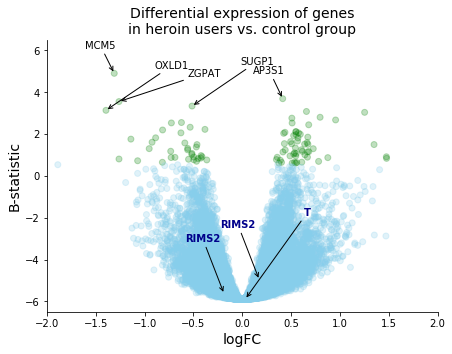

In [6]:
fig, ax = plt.subplots(figsize = (7,5))
heroin['Significant'] = heroin.apply(lambda row: 'green' if row['adj.P.Val'] < 0.05 else 'skyblue', axis = 1)
plt.scatter(heroin.logFC, heroin.B, color = heroin['Significant'], alpha = 0.25)
# alternative y-axis: -np.log10(heroin['adj.P.Val'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim([-2,2])
plt.ylim([-6.5, 6.5])
plt.xlabel('logFC', fontsize = 14)
plt.ylabel('B-statistic', fontsize = 14)
plt.title('Differential expression of genes\nin heroin users vs. control group', fontsize = 14)
# note how you can use .iterrows to loop through row indices and full rows (pandas Series object)
for index, row in heroin[:5].iterrows():
    if index < 2:
        ax.annotate(row['Gene.symbol'], xy=(row['logFC'], row['B']), xytext = (row['logFC']-0.3, row['B']+1.2), arrowprops = dict(arrowstyle = '->'))
    elif index < 3:
        ax.annotate(row['Gene.symbol'], xy=(row['logFC'], row['B']), xytext = (row['logFC']+0.7, row['B']+1.2), arrowprops = dict(arrowstyle = '->'))
    elif index < 5:
        ax.annotate(row['Gene.symbol'], xy=(row['logFC'], row['B']), xytext = (row['logFC']+0.5, row['B']+2), arrowprops = dict(arrowstyle = '->'))

for index, row in heroin.iterrows():
    if row['Gene.symbol'] in some_relevant_genes:
        if row['Gene.symbol'] == 'T':
            ax.annotate(row['Gene.symbol'], xy=(row['logFC'], row['B']), xytext = (row['logFC']+0.6, row['B']+4), arrowprops = dict(arrowstyle = '->'), color = 'darkblue', fontweight = 'bold')
        else:
            ax.annotate(row['Gene.symbol'], xy=(row['logFC'], row['B']), xytext = (row['logFC']-0.4, row['B']+2.5), arrowprops = dict(arrowstyle = '->'), color = 'darkblue', fontweight = 'bold')

plt.show()

6. Which chromosomes are the top 10 significant genes located on? One option: Extract chromosome number from `Chromosome.annotation` column, create separate dataframe with columns ['ID', 'Gene symbol', 'Chromosome #', 'B', 'logFC']. Here the data are sorted by the B-statistic but you can sort it by the p-value as well.

In [7]:
list(zip(heroin[:10]['Chromosome.annotation'].str.split(',', expand = True)[0], heroin[:10]['Gene.symbol']))

[('Chromosome 22', 'MCM5'),
 ('Chromosome 5', 'AP3S1'),
 ('Chromosome 20', 'ZGPAT'),
 ('Chromosome 19', 'SUGP1'),
 ('Chromosome 17', 'OXLD1'),
 ('Chromosome 4', 'USP46'),
 ('Chromosome 5', 'MCTP1'),
 ('Chromosome 16', 'CHD9'),
 ('Chromosome 11', 'IPO7'),
 ('Chromosome 20', 'NCOA3')]

7. How many genes go down vs. up in heroin users?

In [8]:
print('Go up in heroin users:', sum(heroin.logFC > 0))
print('Go down in heroin users:', sum(heroin.logFC <= 0))

Go up in heroin users: 12106
Go down in heroin users: 10177


### You can also use a different dataset to practice making plots like this one:

<img src="files/ma_sample_plot.png" align = 'left' width = 400>

Source: https://www.bioinformatics.babraham.ac.uk/projects/seqmonk/Help/3%20Visualisation/3.2%20Figures%20and%20Graphs/3.2.13%20The%20MA%20Plot.html

#### MA plot instructions:
1. Download the dataset: https://www.kaggle.com/andrewgao/alzheimers-gene-expression-profiles

Look at the original paper: https://academic.oup.com/hmg/article/20/23/4530/558164

2. GSM701542 and GSM701543 are sporadic Parkinson's disease patient derived iPSC samples; GSM701544 and GSM701545 are samples with Alzheimer's disease. Create a new column: mean expression of specific genes across samples (across columns `GSM701542`, `GSM701543`,  `GSM701544`,  `GSM701545`).

3. Plot the mean gene expression (your new column, x-axis) against `log 2 fold change`. Try doing this using `matplotlib`, but if stuck, here's another option: https://reneshbedre.github.io/blog/ma.html.

In [9]:
alzh = pd.read_csv('GSE28379 - GSE28379_series_matrix.csv')

In [10]:
alzh.head()

,ID_REF,GSM701542,GSM701543,GSM701544,GSM701545,no mutation,mutation,log 2 fold change,fold change
0,1007_s_at,615.52540,739.778000,720.900400,735.847500,677.651700,728.373950,0.104135,1.074850
1,1053_at,319.87120,654.391660,319.871400,319.871500,487.131430,319.871450,-0.606819,0.656643
2,117_at,20.04304,32.151443,14.417517,24.944078,26.097241,19.680798,-0.407109,0.754133
3,121_at,239.84415,171.029600,137.311610,176.759780,205.436875,157.035695,-0.387603,0.764399
4,1255_g_at,155.14342,335.751860,177.997860,128.042790,245.447640,153.020325,-0.681692,0.623434


In [11]:
alzh['mean_expr'] = alzh.apply(lambda row:
                               np.mean([row.GSM701542, row.GSM701543, row.GSM701544, row.GSM701545]),
                               axis = 1)

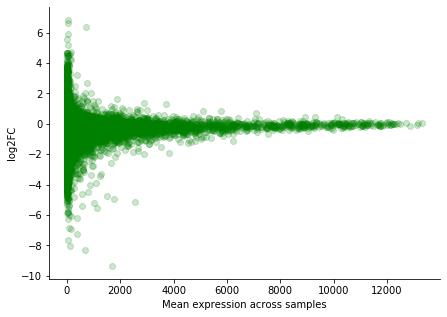

In [12]:
fig, ax = plt.subplots(figsize = (7,5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(alzh.mean_expr, alzh['log 2 fold change'], color = 'green', alpha = 0.2)
plt.xlabel('Mean expression across samples')
plt.ylabel('log2FC')
plt.show()